In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data file

In [3]:
df=pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Now Split DataSet into 2 parts
# Numeric type and Categorical type
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [5]:
# To convert categorical type data into '0'& '1'.
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
    
    

In [6]:
# After applying LabelEncoder we concatenate df_cat and df_num.
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [7]:
df_new.tail()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0
45210,37,2971,17,361,2,188,11,2,1,1,0,0,0,0,9,1,0


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   balance    45211 non-null  int64
 2   day        45211 non-null  int64
 3   duration   45211 non-null  int64
 4   campaign   45211 non-null  int64
 5   pdays      45211 non-null  int64
 6   previous   45211 non-null  int64
 7   job        45211 non-null  int32
 8   marital    45211 non-null  int32
 9   education  45211 non-null  int32
 10  default    45211 non-null  int32
 11  housing    45211 non-null  int32
 12  loan       45211 non-null  int32
 13  contact    45211 non-null  int32
 14  month      45211 non-null  int32
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [9]:
df_new.isna().sum()

age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

In [10]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0


In [66]:
# visualizations

<AxesSubplot:>

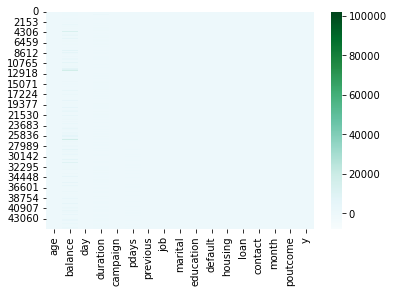

In [67]:
sns.heatmap(df_new,cmap='BuGn')

<AxesSubplot:xlabel='y', ylabel='count'>

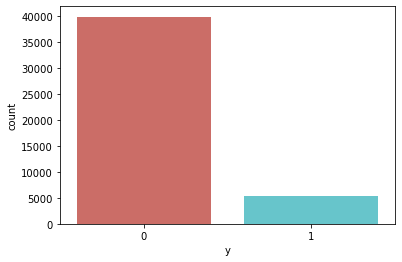

In [68]:
sns.countplot(x="y",data=df_new,palette="hls") 

<AxesSubplot:xlabel='education', ylabel='count'>

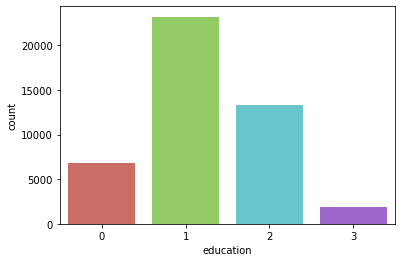

In [69]:
sns.countplot(x="education",data=df_new,palette="hls") 

<AxesSubplot:xlabel='job', ylabel='count'>

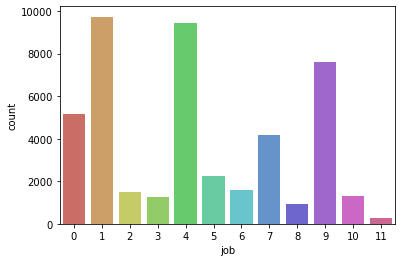

In [70]:
sns.countplot(x="job",data=df_new,palette="hls")

<AxesSubplot:xlabel='housing', ylabel='count'>

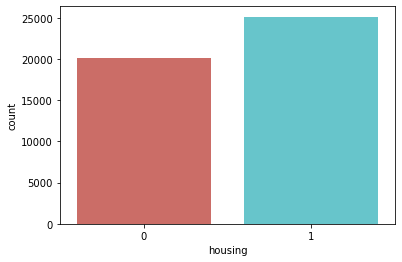

In [71]:
sns.countplot(x="housing",data=df_new,palette="hls")

<AxesSubplot:xlabel='marital', ylabel='count'>

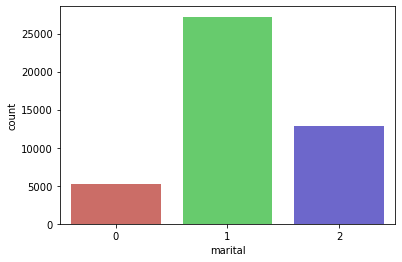

In [72]:
sns.countplot(x="marital",data=df_new,palette="hls")

<AxesSubplot:xlabel='loan', ylabel='count'>

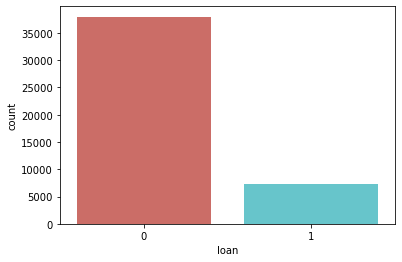

In [73]:
sns.countplot(x="loan",data=df_new,palette="hls")

<AxesSubplot:xlabel='contact', ylabel='count'>

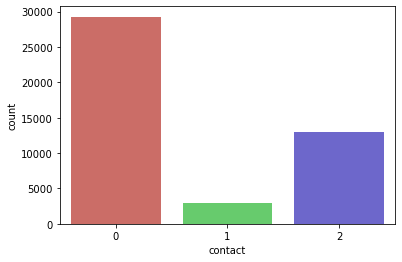

In [74]:
sns.countplot(x="contact",data=df_new,palette="hls")

<AxesSubplot:xlabel='month', ylabel='count'>

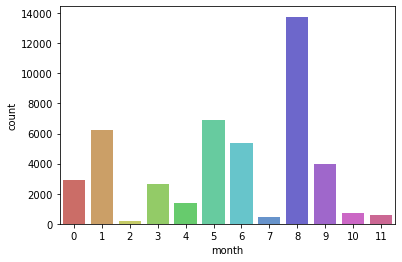

In [75]:
sns.countplot(x="month",data=df_new,palette="hls")

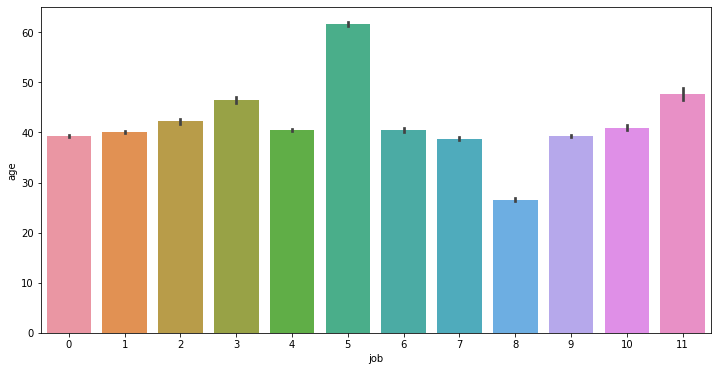

In [76]:
 f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='job',y='age' , data=df_new);

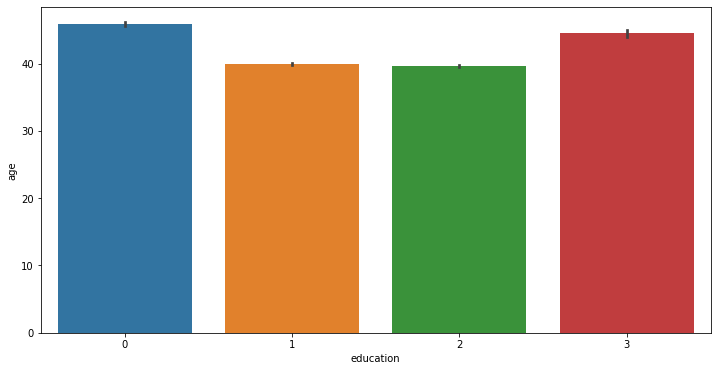

In [77]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='education',y='age' , data=df_new);

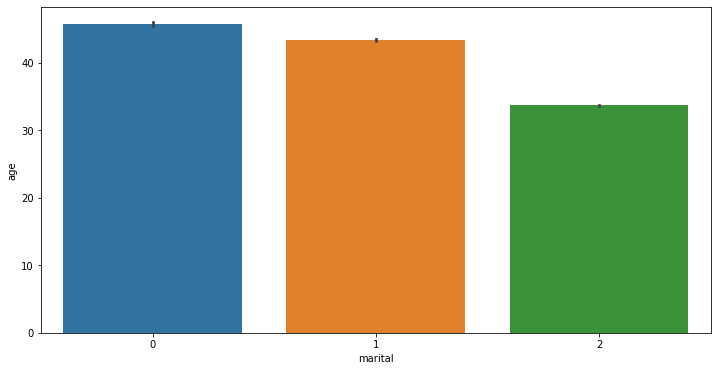

In [78]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='marital',y='age' , data=df_new);

In [11]:
# Split dataset in input and output
X=df_new.iloc[:,0:16]
Y=df_new['y']

In [12]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3


In [13]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [21]:
# Model building 
from sklearn.linear_model import LogisticRegression
bank = LogisticRegression(class_weight={0:0.3,1:0.7})
bank.fit(X,Y)

LogisticRegression(class_weight={0: 0.3, 1: 0.7})

In [15]:
 # coefficients of features 
bank.coef_

array([[-3.16827614e-02,  4.00155603e-05, -8.41960770e-03,
         3.27109334e-03, -2.67036070e-01, -1.23803399e-03,
         1.19992243e-01,  1.45638993e-02, -9.21187501e-02,
        -1.31784629e-02, -4.79332103e-03, -1.81584212e-01,
        -5.35006268e-02, -1.86739621e-01, -6.00334920e-02,
        -1.80563090e-01]])

In [16]:
# Predicted values
y_pred = bank.predict(X)
df_new["y_pred"] = y_pred
df_new  

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,y_pred
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1,0
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1,0
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1,0
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0,0


In [17]:
# probability values of the predicted values
y_prob = pd.DataFrame(bank.predict_proba(X.iloc[:,:]))
df_new = pd.concat([df_new,y_prob],axis=1)
df_new 

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,y_pred,0,1
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0,0,0.948522,0.051478
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0,0,0.948861,0.051139
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0,0,0.946947,0.053053
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0,0,0.960850,0.039150
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0,0,0.903369,0.096631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1,0,0.615350,0.384650
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1,0,0.920145,0.079855
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1,0,0.671836,0.328164
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0,0,0.940335,0.059665


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

[[39279   643]
 [ 4438   851]]


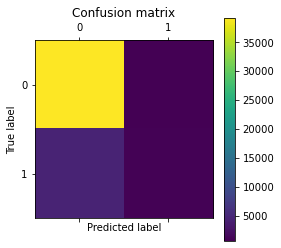

In [19]:
# Show confusion matrix in a separate window
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<AxesSubplot:>

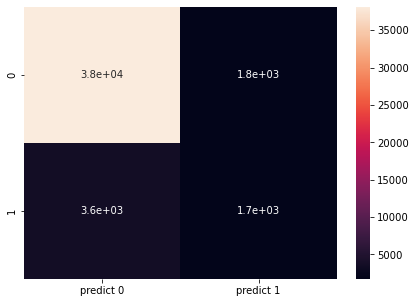

In [88]:
# to represent the confusion matrix using heat map
df_cm=pd.DataFrame(confusion_matrix,index=[i for i in ['0','1']],
                   columns=[i for i in ['predict 0','predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True
           )

In [20]:
df_new.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [89]:
# using cross tab metho d to represent confusion matrix
pd.crosstab(Y,y_pred)

col_0,0,1
y,,
0,38109,1813
1,3551,1738


In [90]:
# model fitted accurecy
accuracy = sum(Y==y_pred)/df_new.shape[0]
accuracy 

0.8813563070934065

In [36]:
# model summary
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     39922
           1       0.49      0.33      0.39      5289

    accuracy                           0.88     45211
   macro avg       0.70      0.64      0.66     45211
weighted avg       0.87      0.88      0.87     45211



In [37]:
# find the roc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,bank.predict(X))
Logit_roc_score  

0.6415964927221619

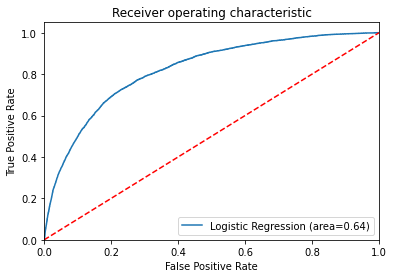

In [38]:
#  visualizing the ROC curve
fpr, tpr, thresholds = roc_curve(Y,bank.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [39]:
y_prob1 = pd.DataFrame(bank.predict_proba(X)[:,1]) 
y_prob1 

,0
0,0.119613
1,0.095227
2,0.085457
3,0.079975
4,0.147498
...,...
45206,0.596139
45207,0.191241
45208,0.640629
45209,0.145992


In [40]:
# calculate the fpr and tpr
print(fpr)
   
print(tpr)

[0.00000000e+00 2.50488452e-05 7.51465357e-05 ... 9.97319774e-01
 9.97319774e-01 1.00000000e+00]
[0.         0.         0.         ... 0.99981093 1.         1.        ]


In [41]:
# to find the allthreshold values

from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(bank.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
777,6.943583e-01,0.887970
776,6.945726e-01,0.887970
775,6.946533e-01,0.887948
778,6.940770e-01,0.887948
779,6.940626e-01,0.887926
...,...,...
7636,5.399539e-03,0.127204
7637,5.363277e-03,0.127181
7638,4.693342e-04,0.119351
7639,4.671591e-04,0.119329


In [42]:
# to find the best fited threshold

from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.245137


In [43]:
# model-2 (after finding the best fitted threshold )

threshold =0.245137
preds = np.where(bank.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))   

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     39922
           1       0.30      0.72      0.42      5289

    accuracy                           0.77     45211
   macro avg       0.63      0.75      0.64     45211
weighted avg       0.88      0.77      0.80     45211



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(Y,preds)
print (confusion_matrix1) 

[[30804  9118]
 [ 1459  3830]]


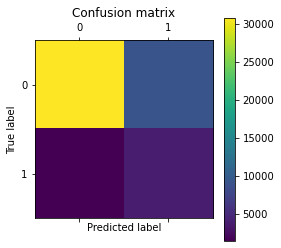

In [45]:
# Show confusion matrix in a separate window
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<AxesSubplot:>

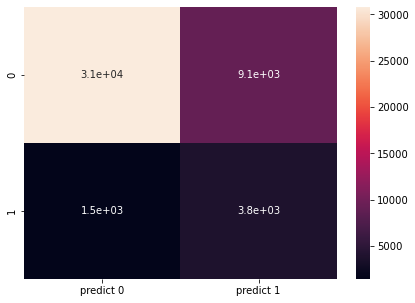

In [46]:
# to represent the confusion matrix using heat map
df_cm=pd.DataFrame(confusion_matrix1,index=[i for i in ['0','1']],
                   columns=[i for i in ['predict 0','predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True
           )

In [93]:
# using cross tab metho d to represent confusion matrix
pd.crosstab(Y,preds)

col_0,0,1
y,,
0,30804,9118
1,1459,3830
